In [2]:
import pandas as pd
import seaborn as sns
import numpy 
import matplotlib as plt

In [3]:
train = pd.read_csv("train_HK6lq50.csv")

In [4]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [5]:
train['is_pass'].value_counts()

1    50867
0    22280
Name: is_pass, dtype: int64

In [6]:
pass_exam = [x for x in train['is_pass'] if x == 1]
fail_exam = [x for x in train['is_pass'] if x == 0]

In [7]:
print(len(pass_exam), len(fail_exam), 100*len(pass_exam)/(len(pass_exam) + len(fail_exam)), 100*len(fail_exam)/(len(pass_exam) + len(fail_exam)))

50867 22280 69.54078772882005 30.459212271179954


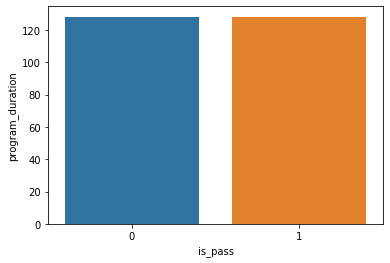

In [8]:
sns.barplot(x='is_pass', y='program_duration', data=train)

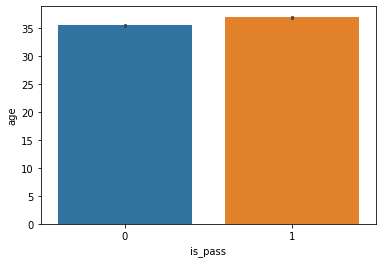

In [9]:
sns.barplot(x='is_pass', y='age', data=train)

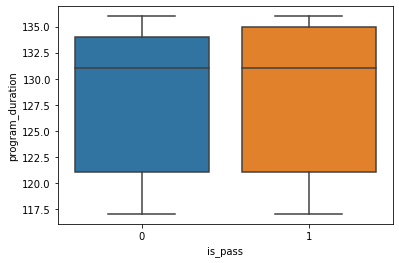

In [10]:
sns.boxplot(x='is_pass', y='program_duration', data=train)

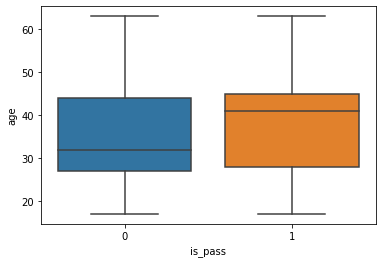

In [11]:
sns.boxplot(x='is_pass', y='age', data=train)

In [12]:
train['test_type'].value_counts()

offline    43543
online     29604
Name: test_type, dtype: int64

In [13]:
train['test_type'] = train['test_type'].replace({'offline':0, 'online':1})

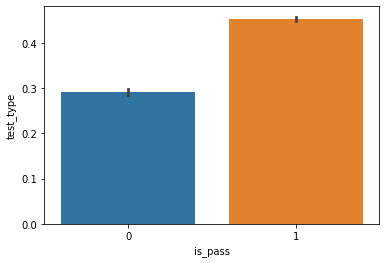

In [14]:
sns.barplot(x='is_pass', y='test_type', data=train)

In [15]:
# sns.swarmplot(x='is_pass', y='test_type', data=train)

In [16]:
test_type = pd.crosstab(index = train['is_pass'], columns=train['test_type'])
test_type

test_type,0,1
is_pass,,
0,15767,6513
1,27776,23091


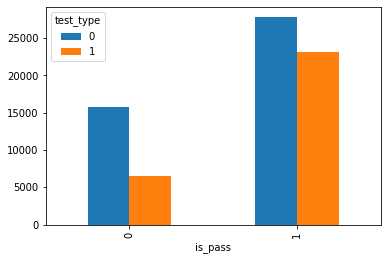

In [17]:
test_type.plot.bar()

In [18]:
train['difficulty_level'].value_counts()

easy            40101
intermediate    20668
hard            10297
vary hard        2081
Name: difficulty_level, dtype: int64

In [19]:
difficulty_level = pd.crosstab(index = train['is_pass'], columns=train['difficulty_level'])
difficulty_level

difficulty_level,easy,hard,intermediate,vary hard
is_pass,,,,
0,10539,3423,7133,1185
1,29562,6874,13535,896


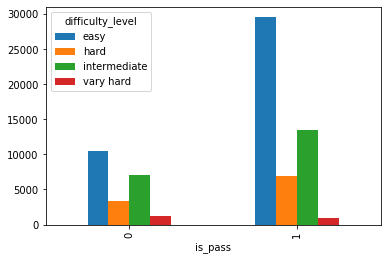

In [20]:
difficulty_level.plot.bar()

In [21]:
difficulty = {'easy':0, 'intermediate':1, 'hard':2, 'vary hard':3}
train['difficulty_level'] = train['difficulty_level'].replace(difficulty)

In [22]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,0,1,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,0,0,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,1,0,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,0,0,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,0,1,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [23]:
sex = pd.crosstab(index = train['is_pass'], columns=train['gender'])
sex

gender,F,M
is_pass,,
0,10730,11550
1,23374,27493


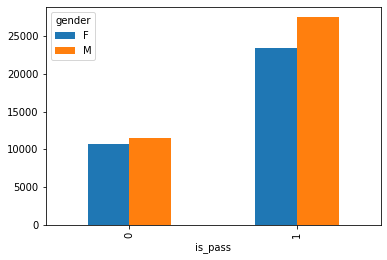

In [24]:
sex.plot.bar()

In [25]:
gender = {'M':0, 'F':1}
train['gender'] = train['gender'].replace(gender)

In [26]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,0,1,9389,0,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,0,0,16523,1,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,1,0,13987,0,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,0,0,13158,1,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,0,1,10591,1,High School Diploma,1,42.0,2,N,4.0,1


In [27]:
train['education'].value_counts()

High School Diploma    34371
Matriculation          26169
Bachelors              11581
No Qualification         514
Masters                  512
Name: education, dtype: int64

In [28]:
education = pd.crosstab(index=train['is_pass'], columns=train['education'])
education

education,Bachelors,High School Diploma,Masters,Matriculation,No Qualification
is_pass,,,,,
0,2982,9803,85,9196,214
1,8599,24568,427,16973,300


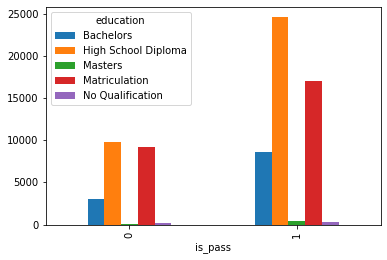

In [29]:
education.plot.bar()

In [30]:
education = {'No Qualification':0, 'High School Diploma':1, 'Matriculation':2, 'Bachelors':3, 'Masters':4}
train['education'] = train['education'].replace(education)

In [31]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,0,1,9389,0,2,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,0,0,16523,1,1,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,1,0,13987,0,2,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,0,0,13158,1,2,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,0,1,10591,1,1,1,42.0,2,N,4.0,1


In [32]:
train['is_handicapped'].value_counts()

N    66577
Y     6570
Name: is_handicapped, dtype: int64

In [33]:
handicapped = pd.crosstab(index=train['is_pass'], columns=train['is_handicapped'])
handicapped

is_handicapped,N,Y
is_pass,,
0,19923,2357
1,46654,4213


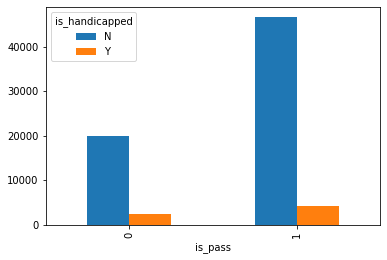

In [34]:
handicapped.plot.bar()

In [35]:
handicapped = {'N':0, 'Y':1}
train['is_handicapped'] = train['is_handicapped'].replace(handicapped)

In [36]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,0,1,9389,0,2,3,24.0,5,0,1.0,0
1,16523_44,T_1,T,131,44,0,0,16523,1,1,4,26.0,2,0,3.0,1
2,13987_178,Z_2,Z,120,178,1,0,13987,0,2,1,40.0,1,0,2.0,1
3,13158_32,T_2,T,117,32,0,0,13158,1,2,3,NaN,4,0,1.0,1
4,10591_84,V_3,V,131,84,0,1,10591,1,1,1,42.0,2,0,4.0,1


In [37]:
train['program_type'].value_counts()

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64

In [38]:
train['program_id'].value_counts()

Y_1    6687
Y_3    6623
T_3    6248
Y_4    5009
T_4    4792
U_1    4748
V_4    4301
T_2    4266
Y_2    4241
V_3    3419
V_1    3409
T_1    3152
U_2    3073
Z_3    2659
Z_2    2097
V_2    1896
Z_1    1873
X_1    1349
X_3    1205
X_2     774
S_2     682
S_1     644
Name: program_id, dtype: int64

In [39]:
program_type = pd.crosstab(index=train['is_pass'], columns=train['program_type']).apply(lambda r: r/r.sum(), axis=1)
program_type

program_type,S,T,U,V,X,Y,Z
is_pass,,,,,,,
0,0.027020,0.249596,0.131553,0.242101,0.027783,0.238869,0.083079
1,0.014233,0.253544,0.096133,0.150019,0.053257,0.338884,0.093931


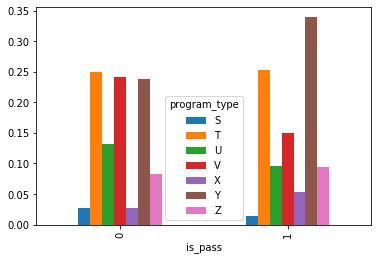

In [40]:
program_type.plot.bar()

In [41]:
program_id = pd.crosstab(index=train['is_pass'], columns=train['program_id']).apply(lambda r: r/r.sum(), axis=1)
program_id

program_id,S_1,S_2,T_1,T_2,T_3,T_4,U_1,U_2,V_1,V_2,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
is_pass,,,,,,,,,,,,,,,,,,,,,
0,0.013689,0.013330,0.069973,0.049686,0.074506,0.055431,0.076032,0.055521,0.059246,0.036176,...,0.009740,0.007316,0.010727,0.063914,0.047980,0.076661,0.050314,0.025180,0.026167,0.031732
1,0.006664,0.007569,0.031317,0.062103,0.090196,0.069927,0.060039,0.036094,0.041068,0.021428,...,0.022254,0.012012,0.018991,0.103466,0.062359,0.096625,0.076435,0.025793,0.029764,0.038375


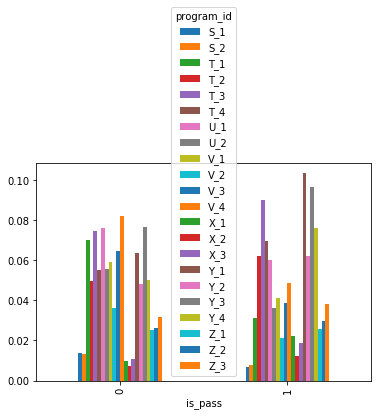

In [42]:
program_id.plot.bar()

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
train_big = pd.get_dummies(train['program_type'])

In [45]:
train_big.head()

,S,T,U,V,X,Y,Z
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [46]:
train1 = train.join(train_big)

In [47]:
train1.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,...,is_handicapped,trainee_engagement_rating,is_pass,S,T,U,V,X,Y,Z
0,9389_150,Y_1,Y,136,150,0,1,9389,0,2,...,0,1.0,0,0,0,0,0,0,1,0
1,16523_44,T_1,T,131,44,0,0,16523,1,1,...,0,3.0,1,0,1,0,0,0,0,0
2,13987_178,Z_2,Z,120,178,1,0,13987,0,2,...,0,2.0,1,0,0,0,0,0,0,1
3,13158_32,T_2,T,117,32,0,0,13158,1,2,...,0,1.0,1,0,1,0,0,0,0,0
4,10591_84,V_3,V,131,84,0,1,10591,1,1,...,0,4.0,1,0,0,0,1,0,0,0


In [48]:
train1 = train1.drop(['program_id', 'id','program_type', 'test_id'], axis=1)

In [49]:
train1.head()

,program_duration,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,S,T,U,V,X,Y,Z
0,136,0,1,9389,0,2,3,24.0,5,0,1.0,0,0,0,0,0,0,1,0
1,131,0,0,16523,1,1,4,26.0,2,0,3.0,1,0,1,0,0,0,0,0
2,120,1,0,13987,0,2,1,40.0,1,0,2.0,1,0,0,0,0,0,0,1
3,117,0,0,13158,1,2,3,NaN,4,0,1.0,1,0,1,0,0,0,0,0
4,131,0,1,10591,1,1,1,42.0,2,0,4.0,1,0,0,0,1,0,0,0


In [50]:
train1.describe()

,program_duration,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,S,T,U,V,X,Y,Z
count,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73147.000000,73070.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000
mean,128.208676,0.404719,0.649446,9843.079620,0.466239,1.688381,2.246845,36.494033,2.583934,0.089819,2.395634,0.695408,0.018128,0.252341,0.106922,0.178066,0.045497,0.308420,0.090626
std,6.889679,0.490841,0.824570,5703.556093,0.498862,0.766304,1.011587,9.041119,1.240816,0.285924,1.325288,0.460238,0.133415,0.434359,0.309016,0.382571,0.208394,0.461844,0.287078
min,117.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,0.000000,0.000000,5040.000000,0.000000,1.000000,1.000000,28.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,131.000000,0.000000,0.000000,9641.000000,0.000000,2.000000,2.000000,39.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,1.000000,1.000000,14552.000000,1.000000,2.000000,3.000000,45.000000,3.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,136.000000,1.000000,3.000000,20098.000000,1.000000,4.000000,4.000000,63.000000,14.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   program_duration           73147 non-null  int64  
 1   test_type                  73147 non-null  int64  
 2   difficulty_level           73147 non-null  int64  
 3   trainee_id                 73147 non-null  int64  
 4   gender                     73147 non-null  int64  
 5   education                  73147 non-null  int64  
 6   city_tier                  73147 non-null  int64  
 7   age                        45418 non-null  float64
 8   total_programs_enrolled    73147 non-null  int64  
 9   is_handicapped             73147 non-null  int64  
 10  trainee_engagement_rating  73070 non-null  float64
 11  is_pass                    73147 non-null  int64  
 12  S                          73147 non-null  uint8  
 13  T                          73147 non-null  uin

In [52]:
train1.isnull().sum()

program_duration                 0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
S                                0
T                                0
U                                0
V                                0
X                                0
Y                                0
Z                                0
dtype: int64

In [53]:
train['trainee_engagement_rating'].value_counts()

1.0    25595
2.0    17234
4.0    13113
3.0    11553
5.0     5575
Name: trainee_engagement_rating, dtype: int64

In [54]:
train1.head(200)

,program_duration,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,S,T,U,V,X,Y,Z
0,136,0,1,9389,0,2,3,24.0,5,0,1.0,0,0,0,0,0,0,1,0
1,131,0,0,16523,1,1,4,26.0,2,0,3.0,1,0,1,0,0,0,0,0
2,120,1,0,13987,0,2,1,40.0,1,0,2.0,1,0,0,0,0,0,0,1
3,117,0,0,13158,1,2,3,NaN,4,0,1.0,1,0,1,0,0,0,0,0
4,131,0,1,10591,1,1,1,42.0,2,0,4.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,121,0,2,2865,0,3,1,NaN,3,0,2.0,1,0,0,0,0,1,0,0
196,120,1,0,2019,0,3,1,46.0,2,0,4.0,1,0,0,0,0,0,1,0
197,120,1,0,756,0,1,3,NaN,2,0,2.0,1,0,1,0,0,0,0,0
198,136,1,0,13685,0,2,4,NaN,3,0,5.0,1,0,0,0,0,0,1,0


In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=numpy.nan, strategy='mean')

In [56]:
train1['age'] = imputer.fit_transform(train1['age'].values.reshape(-1, 1))

In [57]:
imputer2 = SimpleImputer(missing_values=numpy.nan, strategy='most_frequent')

In [58]:
train1['trainee_engagement_rating'] = train['trainee_engagement_rating']
train1['trainee_engagement_rating'] = imputer2.fit_transform(train1['trainee_engagement_rating'].values.reshape(-1, 1))

In [59]:
train1.head()

,program_duration,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,S,T,U,V,X,Y,Z
0,136,0,1,9389,0,2,3,24.000000,5,0,1.0,0,0,0,0,0,0,1,0
1,131,0,0,16523,1,1,4,26.000000,2,0,3.0,1,0,1,0,0,0,0,0
2,120,1,0,13987,0,2,1,40.000000,1,0,2.0,1,0,0,0,0,0,0,1
3,117,0,0,13158,1,2,3,36.494033,4,0,1.0,1,0,1,0,0,0,0,0
4,131,0,1,10591,1,1,1,42.000000,2,0,4.0,1,0,0,0,1,0,0,0


In [60]:
X = train1.drop('is_pass', axis=1)
y = train1['is_pass']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [63]:
X_train.head()

,program_duration,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,S,T,U,V,X,Y,Z
69205,130,0,0,1986,1,2,3,27.000000,1,1,1.0,0,0,0,0,0,0,1
40981,134,1,0,9521,0,2,2,42.000000,6,0,2.0,0,1,0,0,0,0,0
45199,130,1,0,11282,0,2,1,36.494033,1,0,1.0,0,0,0,0,0,0,1
670,120,0,2,13819,0,2,3,36.494033,2,0,4.0,0,0,0,0,0,1,0
2924,117,0,1,363,1,3,3,45.000000,2,0,1.0,0,1,0,0,0,0,0


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
grid = param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l2'], 'class_weight':['dict', 'balanced']}

In [69]:
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

tuned hpyerparameters :(best parameters)  {'C': 1, 'class_weight': 'dict', 'penalty': 'l2'}
accuracy : 0.706964449730251


C:\Users\shunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
# from sklearn.ensemble import RandomForestClassifier
# #Randomized Search CV

# # Number of trees in random forest
# n_estimators = [int(x) for x in numpy.linspace(start = 100, stop = 1200, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in numpy.linspace(5, 30, num = 6)]
# # max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]
# # Method of selecting samples for training each tree
# # bootstrap = [True, False]

In [71]:
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

In [72]:
#rf = RandomForestClassifier()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400,
 min_samples_split = 10,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 30)

In [73]:
rf.fit(X_train,y_train)
#rf_random.best_params_
#rf_random.best_score_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
y_pred = rf.predict(X_test)
print('Accuracy of random forest regression classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest regression classifier on test set: 0.75


In [75]:
import xgboost as xgb

In [76]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
y_pred = clf.predict(X_test)
print('Accuracy of XG Boost classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of XG Boost classifier on test set: 0.72


In [78]:
#Randomized Search CV

# # Number of trees in random forest
# n_estimators = [int(x) for x in numpy.linspace(start = 100, stop = 1200, num = 12)]
# # Various learning rate parameters
# learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in numpy.linspace(5, 30, num = 6)]
# # max_depth.append(None)
# #Subssample parameter values
# subsample=[0.7,0.6,0.8]
# # Minimum child weight parameters
# min_child_weight=[3,4,5,6,7]

In [79]:
# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'learning_rate': learning_rate,
#                'max_depth': max_depth,
#                'subsample': subsample,
#                'min_child_weight': min_child_weight}

# print(random_grid)

In [80]:
clf=xgb.XGBClassifier(subsample = 0.8,
 n_estimators = 800,
 min_child_weight = 4,
 max_depth = 10,
 learning_rate = 0.05)

In [81]:
# from sklearn.model_selection import RandomizedSearchCV
# xg_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [82]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [83]:
y_pred = clf.predict(X_test)
print('Accuracy of XG Boost classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of XG Boost classifier on test set: 0.76
